In [148]:
import numpy as np

In [149]:
# dummy variable is gotten using numpy
# x = [hours sleeping, hours studying], y = student test score

In [150]:
x = np.array(([2, 9], [3, 5], [2, 7], [4, 6]), dtype = float)
y = np.array(([90], [81], [86], [83]), dtype = float) # these are the values we wanna predict

In [151]:
# scaling the units to range btwn zero and 1
# dividing each entry by the maximum of its column
x = x/np.amax(x, axis=0)
y = y/100

In [152]:
print(x)
print(y)

[[0.5        1.        ]
 [0.75       0.55555556]
 [0.5        0.77777778]
 [1.         0.66666667]]
[[0.9 ]
 [0.81]
 [0.86]
 [0.83]]


In [153]:
class neuralNet(object):
    def __init__(self):
        # defining layers
        self.input = 2
        self.output = 1
        self.hidden = 3
        # defining weights
        self.w1 = np.random.randn(self.input, self.hidden) # from input to hidden layer(2,3) weight matrix
        self.w2 = np.random.randn(self.hidden, self.output) # from hidden to output layer
        
    def feedForward(self, x):
        # forward prop through the neural network
        self.t = np.dot(x, self.w1) # mult input and first set of weight(2x3)
        self.t2 = self.sigmoid(self.t) # this is the activation function
        # the sigmoid function simply takes a number and turns it into a probability (between 0 & 1)
        self.t3 = np.dot(self.t2, self.w2) # mult activation function with second set of weight(3x1)
        output = self.sigmoid(self.t3)
        return output
        
    def sigmoid(self, sig, derive=False):
        if(derive == True):
            return sig * (1 - sig)
        return 1/(1 + np.exp(-sig)) # returns the sigmoid itself
    
    def backPropagation(self, x, y, output):
        self.output_error = y - output # this is the error in output (expected - predicted)
        self.output_delta = self.output_error * self.sigmoid(output, derive=True)
        
        self.t2_error = self.output_delta.dot(self.w2.T) 
        # how much hidden layer weights contribute to output error
        self.t2_delta = self.t2_error * self.sigmoid(self.t2, derive=True)
        # applying sigmoid derivative to t2 error
        
        self.w1 += x.T.dot(self.t2_delta) # adjusting first set weight
        self.w2 += self.t2.T.dot(self.output_delta) # adjusting second set weight
    
    def train(self, x, y):
        output = self.feedForward(x)
        self.backPropagation(x, y, output)

In [154]:
algorithm = neuralNet()  
for i in range(1000):
    if(i % 100 == 0):
        print(f"at epoch of {i}, the loss is: {np.mean(np.square(y - algorithm.feedForward(x))) * 100}%")
    algorithm.train(x, y)
print(f"input is:  {str(x)}")    
print(f"output is: {str(y)}")
print(f"Predicted output is: {str(algorithm.feedForward(x))}")

at epoch of 0, the loss is: 27.23202409437776%
at epoch of 100, the loss is: 0.1009746284378808%
at epoch of 200, the loss is: 0.08437969235640116%
at epoch of 300, the loss is: 0.07092577776667655%
at epoch of 400, the loss is: 0.060097463112922106%
at epoch of 500, the loss is: 0.051464883680900124%
at epoch of 600, the loss is: 0.04465155803370386%
at epoch of 700, the loss is: 0.03932302567177217%
at epoch of 800, the loss is: 0.0351851369974034%
at epoch of 900, the loss is: 0.03198503060179456%
input is:  [[0.5        1.        ]
 [0.75       0.55555556]
 [0.5        0.77777778]
 [1.         0.66666667]]
output is: [[0.9 ]
 [0.81]
 [0.86]
 [0.83]]
Predicted output is: [[0.87621403]
 [0.83373312]
 [0.8638878 ]
 [0.82397499]]


In [155]:
from collections.abc import Iterable
def list_flat(anylist):
     for item in anylist:
         if isinstance(item, Iterable) and not isinstance(item, str):
             for x in list_flat(item):
                 yield x
         else:        
             yield item

In [159]:
real_out = list(list_flat(y))
pred_out = list(list_flat(algorithm.feedForward(x)))
print("the accuracy for the above real and predicted output data is")
for real, pred in zip(real_out, pred_out):
    print(f"Accuracy is: {real / pred * 100}%")

the accuracy for the above real and predicted output data is
Accuracy is: 102.71462969713667%
Accuracy is: 97.1533915951188%
Accuracy is: 99.54996417929586%
Accuracy is: 100.73121282475024%


In [163]:
# to calculate error and loss
# this is simply the square of the difference btwn the actual output and the predicted output
print(f"The errors are: {err}")
print(f"The loss is: {loss}")

The errors are: [[ 0.01820152]
 [-0.01365547]
 [ 0.00217189]]
The loss is: 0.00017416148631550568


In [85]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [86]:
# some visualization to explain outputs
# we are using xblobs to represent the data
# on the other hand, the yblobs represent the label

In [61]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=4, cluster_std=.5, random_state=2)

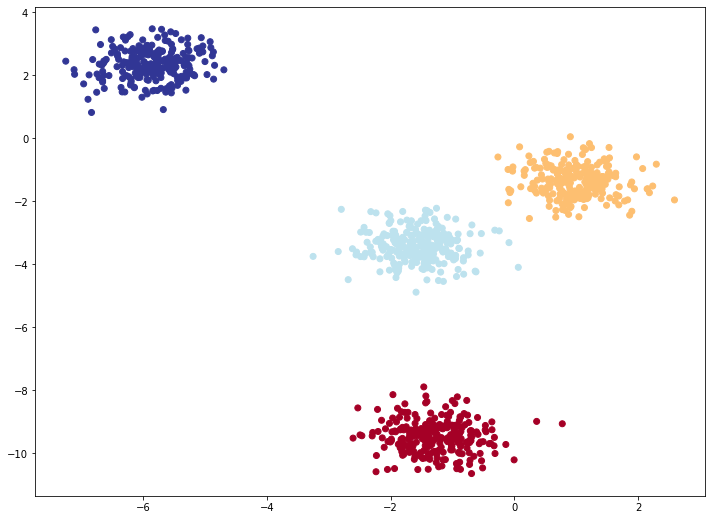

In [64]:
plt.figure(figsize=(12, 9))
plt.scatter(x=X[:, 0], y = X[:, 1], c=y, cmap=plt.cm.RdYlBu)
# plt.scatter()
plt.show()

In [160]:
#Thank you